<a href="https://colab.research.google.com/github/meherkalsi13-png/ds3001_final_project_group_g/blob/main/DS3001_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install package and import the dataset to code**

In [22]:
%pip install ucimlrepo

In [23]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
risk_factor_prediction_of_chronic_kidney_disease = fetch_ucirepo(id=857)

# data (as pandas dataframes)
x = risk_factor_prediction_of_chronic_kidney_disease.data.features.copy()
y = risk_factor_prediction_of_chronic_kidney_disease.data.targets.copy()

# metadata
print(risk_factor_prediction_of_chronic_kidney_disease.metadata, '\n')

# variable information
print(risk_factor_prediction_of_chronic_kidney_disease.variables)

{'uci_id': 857, 'name': 'Risk Factor Prediction of Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/857/risk+factor+prediction+of+chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/857/data.csv', 'abstract': 'Chronic kidney disease (CKD) is an increasing medical issue that declines the productivity of renal capacities and subsequently damages the kidneys.', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 200, 'num_features': 28, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C5WP64', 'creators': ['Md. Ashiqul Islam', 'Shamima Akter'], 'intro_paper': {'ID': 268, 'type': 'NATIVE', 'title': 'Risk Factor Prediction of Chronic Kidney Disease based on Machine L

**Metadata**: '**uci_id**': 857, '**name**': 'Risk Factor Prediction of Chronic Kidney Disease', '**repository_url**': 'https://archive.ics.uci.edu/dataset/857/risk+factor+prediction+of+chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/857/data.csv',

'**abstract**': 'Chronic kidney disease (CKD) is an increasing medical issue that declines the productivity of renal capacities and subsequently damages the kidneys.',

  '**area**': 'Health and Medicine', '**tasks**': ['Classification', 'Regression'],  '**characteristics**': ['Multivariate'],
  '**num_instances**': 200,
  '**num_features**': 28,
  '**feature_types**': ['Real'],
  '**demographics**': [],
  '**target_col**': ['class'],
  '**index_col**': None,
  '**has_missing_values**': 'no',
  '**missing_values_symbol**': None,
  '**year_of_dataset_creation**': 2020,
  '**last_updated**': 'Fri Mar 08 2024',
  '**dataset_doi**': '10.24432/C5WP64',
  '**creators**': ['Md. Ashiqul Islam', 'Shamima Akter'],


'**intro_paper**':
  '**ID**': 268,
  '**type**': 'NATIVE',
  '**title**': 'Risk Factor Prediction of Chronic Kidney Disease based on Machine Learning Algorithms',
  '**authors**': 'M. Islam, S. Akter, M. Hossen, Sadia Ahmed Keya, Sadia Afrin Tisha, Shahed Hossain',
  '**venue**': 'International Conferences on Information Science and System',
  '**year**': 2020,
  '**journal**': None,
  '**DOI**': None,
  '**URL**': 'https://www.semanticscholar.org/paper/a4b90dd7b9dfaffa9eff1efc6555bbce62a963d7',
  '**sha**': None,
  '**corpus**': None,
  '**arxiv**': None,
  '**mag**': None,
  '**acl**': None,
  '**pmid**': None,
  '**pmcid**': None},

'**additional_info**':
  '**summary**': 'This dataset is real Bangladeshi patient data. The dataset is collected from Enam Medical College, Savar, Dhaka, Bangladesh.\n',
  '**purpose**': None,
  '**funded_by**': None,
  '**instances_represent**': None,
  '**recommended_data_splits**': None,
  '**sensitive_data**': None,
  '**preprocessing_description**': 'This dataset is not pre-processed, if you want to apply a Machine learning Algorithm at first you have to need to pre-process the data',
  '**variable_info**': '1. bp(Diastolic)\n2. bp limit\n3. sg\n4. al\n5. class\n6. rbc\n7. su\n8. pc\n9. pcc\n10. ba\n11.bgr\n12. bu\n13. sod\n14. sc\n15. pot\n16. hemo\n17. pcv\n18. rbcc\n19. wbcc\n20. htn\n21. dm\n22. cad\n23. appet\n24. pe\n25. ane\n26. grf\n27. stage\n28. affected\n29. age',
  '**citation**': "M. A. Islam, S. Akter, M. S. Hossen, S. A. Keya, S. A. Tisha and S. Hossain, 'Risk Factor Prediction of Chronic Kidney Disease based on Machine Learning Algorithms,' 2020 3rd International Conference on Intelligent Sustainable Systems (ICISS), Thoothukudi, India, 2020, pp. 952-957, doi: 10.1109/ICISS49785.2020.9315878."


In [24]:
x = x.drop(columns=['bp (Diastolic)', 'bp limit']) #drop both columns because the data does not make sense to be binary - they should be int or float so we remove the columns

x['stage'] = x['stage'].str.replace('s', '').astype(int) #remove 's' from stage to allow the values to be numeric
y['class'] = (
    y['class']
    .astype(str)
    .str.strip()
    .str.lower()
    .map({'ckd': 1, 'notckd': 0})
)

display(x.head()) #X is the different measurements of the patients
display(y.head()) #Y is the class (whether there is chronic kidney disease or not)



,sg,al,rbc,su,pc,pcc,ba,bgr,bu,sod,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,1.019 - 1.021,1-Jan,0,< 0,0,0,0,< 112,< 48.1,138 - 143,...,0,0,0,0,0,0,≥ 227.944,1,1,< 12
1,1.009 - 1.011,< 0,0,< 0,0,0,0,112 - 154,< 48.1,133 - 138,...,0,0,0,0,0,0,≥ 227.944,1,1,< 12
2,1.009 - 1.011,≥ 4,1,< 0,1,0,1,< 112,48.1 - 86.2,133 - 138,...,0,0,0,1,0,0,127.281 - 152.446,1,1,< 12
3,1.009 - 1.011,3-Mar,0,< 0,0,0,0,112 - 154,< 48.1,133 - 138,...,0,0,0,0,0,0,127.281 - 152.446,1,1,< 12
4,1.015 - 1.017,< 0,0,< 0,0,0,0,154 - 196,< 48.1,133 - 138,...,0,1,0,1,1,0,127.281 - 152.446,1,1,20-Dec


,class
0,1
1,1
2,1
3,1
4,1


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Data Cleaning

In [26]:
def clean_numeric(val):
    """
    Convert messy numeric entries to floats.
    Handles cases like:
    - '1.009 - 1.011'
    - '< 0'
    - '≥ 227.944'
    - '12 - 18'
    - 'discrete', 'meta', NaN → np.nan
    """
    if pd.isna(val):
        return np.nan

    s = str(val).strip()

    #remove known non-values
    if s in ['discrete', 'meta', 'nan']:
        return np.nan

    # "< 0" → 0
    if "<" in s:
        return 0.0

    # "≥ 227.944" → 227.944
    if "≥" in s:
        return float(s.replace("≥","").strip())

    #range: "1.009 - 1.011"
    if "-" in s:
        parts = s.split("-")
        try:
            nums = [float(p.strip()) for p in parts]
            return np.mean(nums)  # midpoint
        except:
            return np.nan

    #pure number
    try:
        return float(s)
    except:
        return np.nan

In [27]:
#identify numeric-like columns from the dataset
numeric_cols = [
    col for col in x.columns
    if any(keyword in col.lower() for keyword in
           ["sg","al","su","bgr","bu","sc","sod","pot","hemo","pcv","wc","rc","grf","age"])
]

#apply cleaning
for col in numeric_cols:
    if col in x.columns:
        x[col] = x[col].apply(clean_numeric)

In [28]:
#clean catagorical data
binary_map = {
    'yes': 1, 'no': 0,
    'present': 1, 'notpresent': 0,
    'normal': 0, 'abnormal': 1,
    'good': 0, 'poor': 1,
    '0': 0, '1': 1
}

binary_cols = ['rbc','pc','pcc','ba','htn','dm','cad','pe','ane','appet']

for col in binary_cols:
    if col in x.columns:
        x[col] = (
            x[col]
            .astype(str)
            .str.lower()
            .map(binary_map)
        )

In [29]:
#Data imputation
#filling numeric missing values with column median
for col in x.columns:
    if x[col].dtype != "object":
        x[col] = x[col].fillna(x[col].median())

# one hot encode remaining categorical columns
x = pd.get_dummies(x, drop_first=True)

Data Prep for Model

In [30]:
cols_to_drop = ['affected', 'stage']

for col in cols_to_drop:
    if col in x.columns:
        x = x.drop(columns=[col])
        print(f"Dropped column: {col}")
    else:
        print(f"Column not found (already removed): {col}")


Dropped column: affected
Dropped column: stage


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Target as 1D series
y_series = y['class'].astype(int)

# Train/test split (use y_series here, not y)
X_train, X_test, y_train, y_test = train_test_split(
    x, y_series,
    test_size=0.2,
    random_state=42,
    stratify=y_series
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train shape:", X_train_scaled.shape, " Test shape:", X_test_scaled.shape)
print("Number of features:", X_train_scaled.shape[1], " vs len(x.columns) =", len(x.columns))


Train shape: (160, 38)  Test shape: (40, 38)
Number of features: 38  vs len(x.columns) = 38


EDA

In [32]:
#make copy of df for safety during EDA
df = x.copy()
df['class'] = y['class']

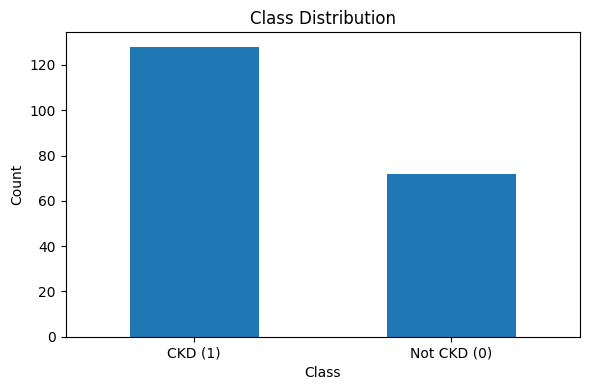

In [33]:
plt.figure(figsize=(6,4))
df['class'].value_counts().plot(kind='bar')
plt.xticks(ticks=[0,1], labels=['CKD (1)', 'Not CKD (0)'], rotation=0)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

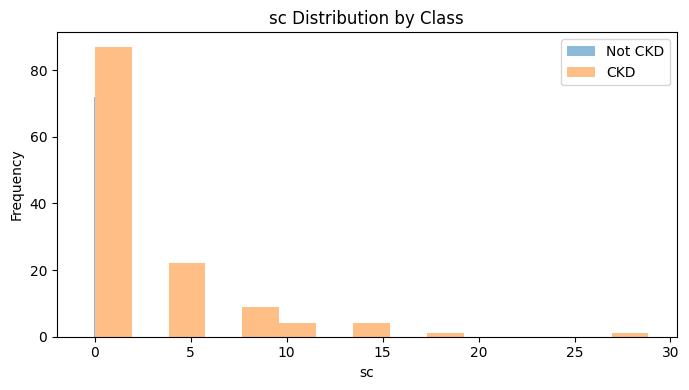

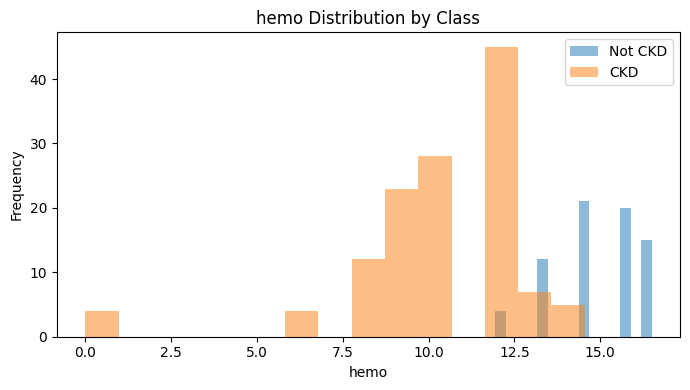

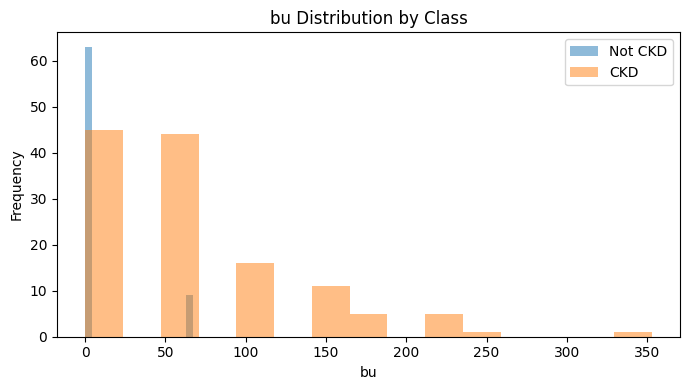

In [34]:
key_numeric = ['sc', 'hemo', 'bu']

for col in key_numeric:
    if col in df.columns:
        plt.figure(figsize=(7,4))
        for label, subset in df.groupby('class'):
            label_name = 'CKD' if label == 1 else 'Not CKD'
            plt.hist(
                subset[col].dropna(),
                bins=15,
                alpha=0.5,
                label=label_name
            )
        plt.title(f'{col} Distribution by Class')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.legend()
        plt.tight_layout()
        plt.show()

In [35]:
group_means = df.groupby('class')[key_numeric].mean()
print(group_means)


             sc       hemo         bu
class                                
0      0.000000  14.956250   8.393750
1      2.670313  10.469531  68.992188


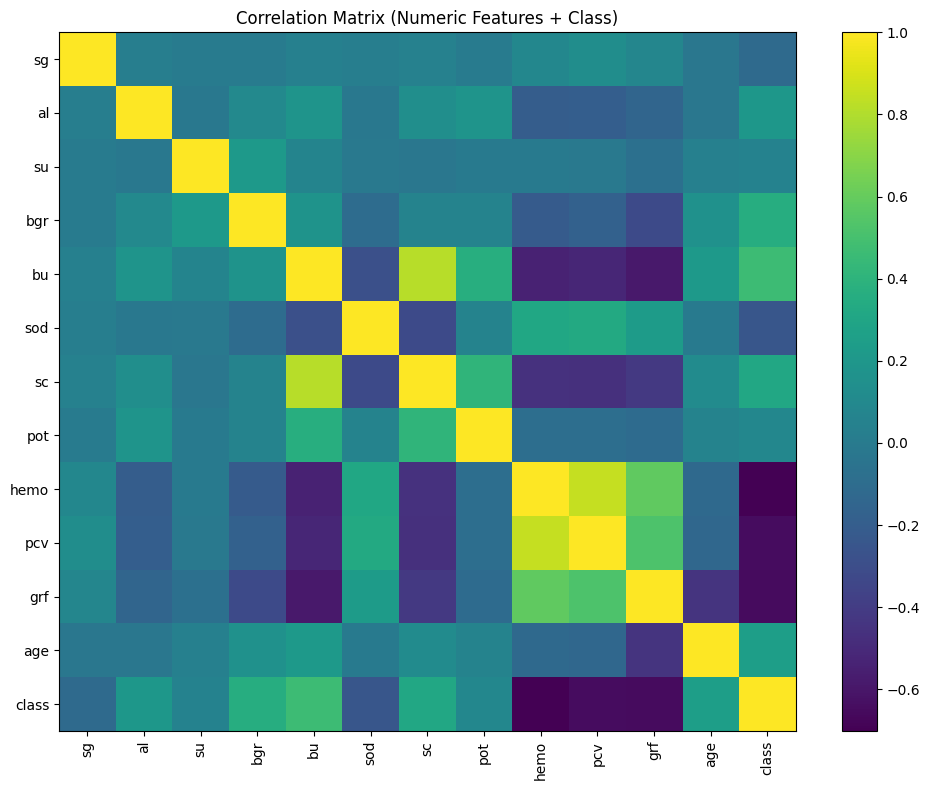

In [36]:
numeric_cols_present = [col for col in numeric_cols if col in df.columns]
numeric_for_corr = df[numeric_cols_present + ['class']].copy()
corr = numeric_for_corr.corr()

plt.figure(figsize=(10,8))
im = plt.imshow(corr, aspect='auto')
plt.colorbar(im)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Matrix (Numeric Features + Class)')
plt.tight_layout()
plt.show()

In [37]:
import seaborn as sns

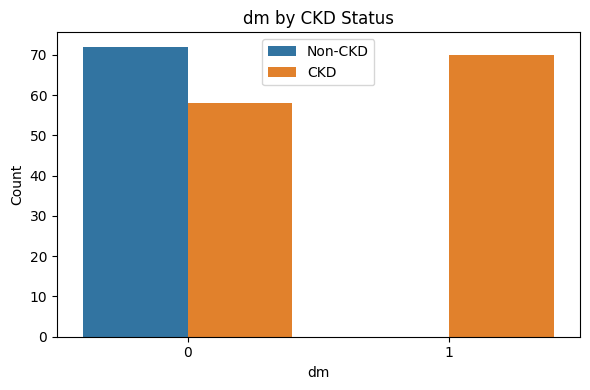

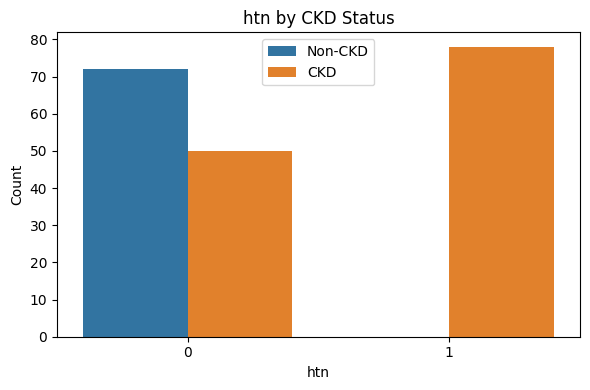

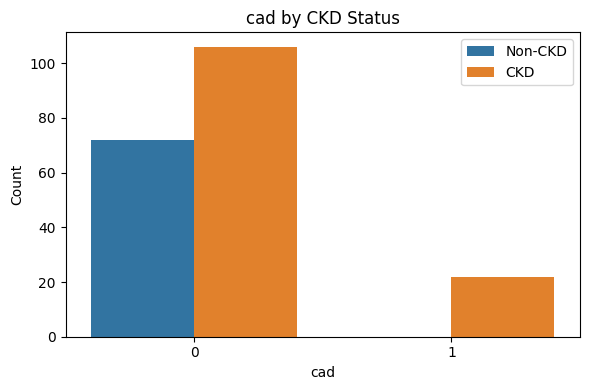

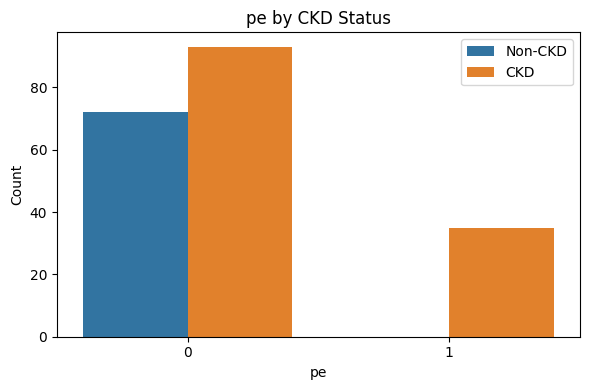

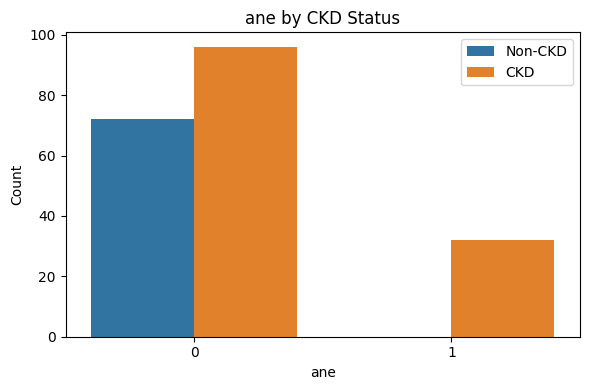

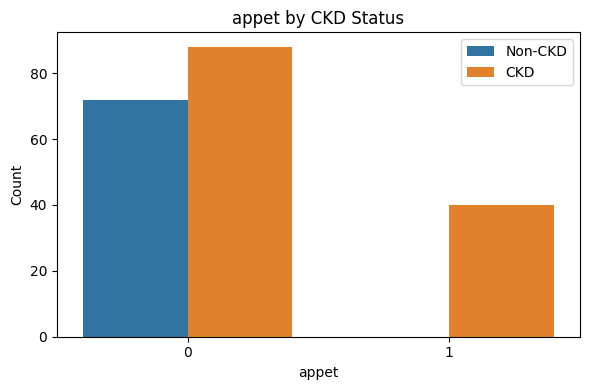

In [38]:
cat_vars = ['dm','htn','cad','pe','ane','appet']
cat_vars = [c for c in cat_vars if c in df.columns]

for col in cat_vars:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='class')
    plt.title(f'{col} by CKD Status')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(["Non-CKD", "CKD"])
    plt.tight_layout()
    plt.show()


Pairs used for scatterplots: [('sc', 'hemo'), ('sc', 'bu'), ('grf', 'sc')]


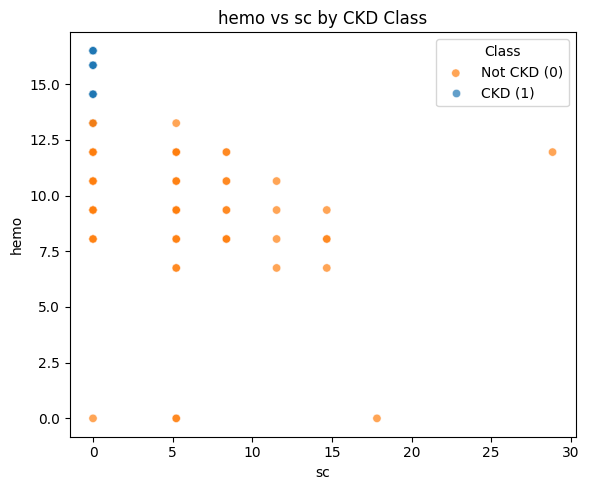

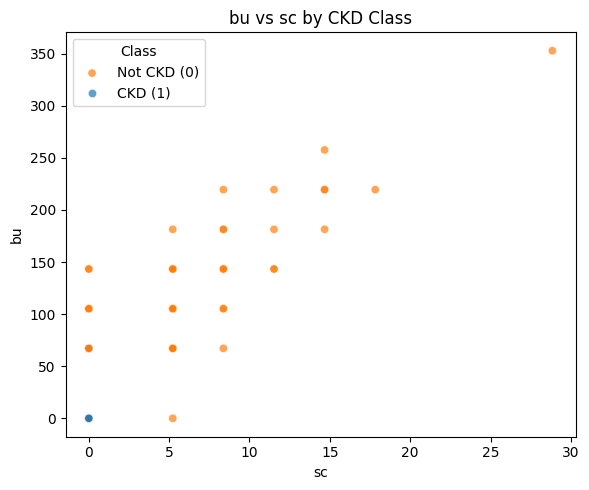

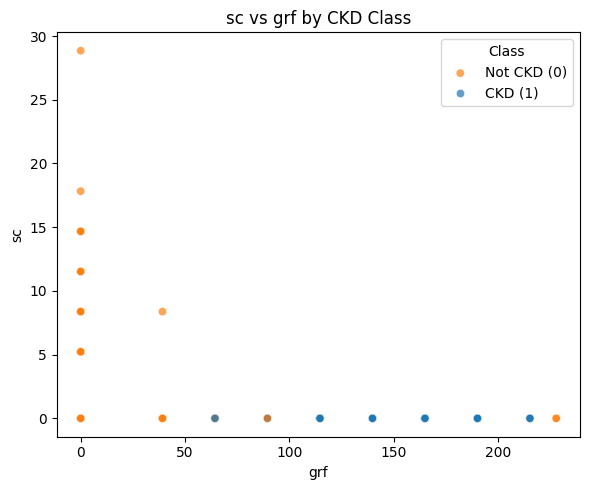

In [39]:
#scatterplots of key numeric pairs by CKD class
pairs = [
    ('sc', 'hemo'),
    ('sc', 'bu'),
    ('bgr', 'bp'),
    ('grf', 'sc')
]

pairs = [(x, y) for x, y in pairs if x in df.columns and y in df.columns]

print("Pairs used for scatterplots:", pairs)

for xcol, ycol in pairs:
    plt.figure(figsize=(6, 5))
    sns.scatterplot(
        data=df,
        x=xcol,
        y=ycol,
        hue='class',
        alpha=0.7
    )
    plt.title(f'{ycol} vs {xcol} by CKD Class')
    plt.xlabel(xcol)
    plt.ylabel(ycol)
    plt.legend(title='Class', labels=['Not CKD (0)', 'CKD (1)'])
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-1801048491.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue='class', fill=True, common_norm=False) # Generate a KDE plot


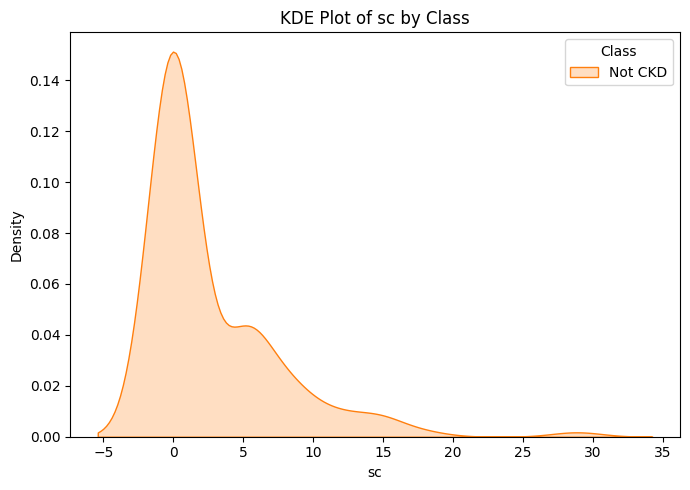

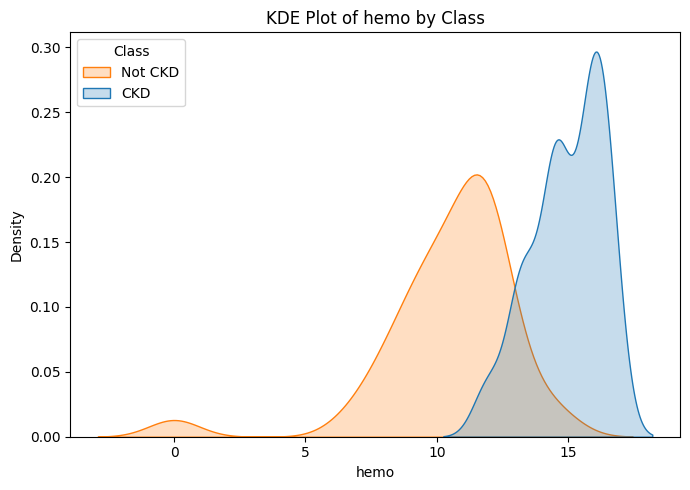

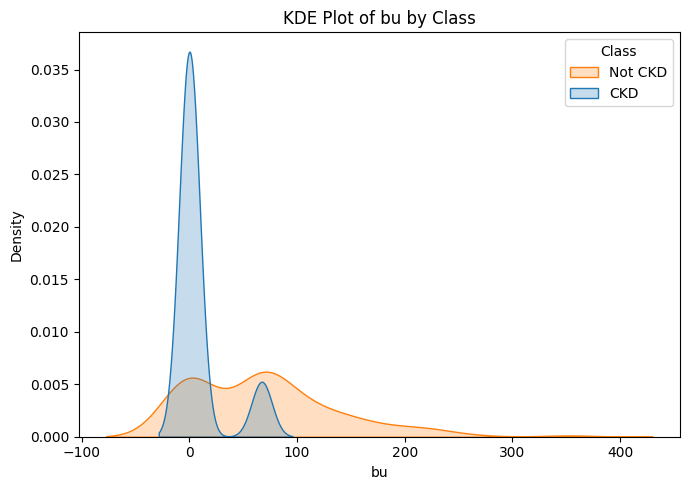

In [40]:
import seaborn as sns

for col in key_numeric:
    if col in df.columns:
        plt.figure(figsize=(7, 5))
        sns.kdeplot(data=df, x=col, hue='class', fill=True, common_norm=False) # Generate a KDE plot
        plt.title(f'KDE Plot of {col} by Class')
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.legend(title='Class', labels=['Not CKD', 'CKD'])
        plt.tight_layout()
        plt.show()

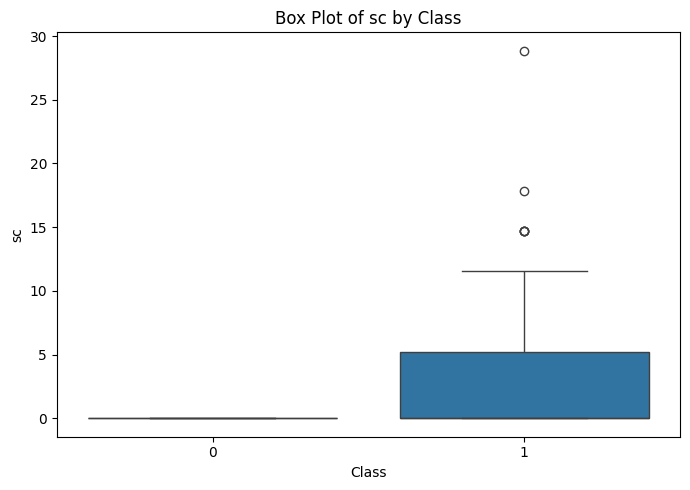

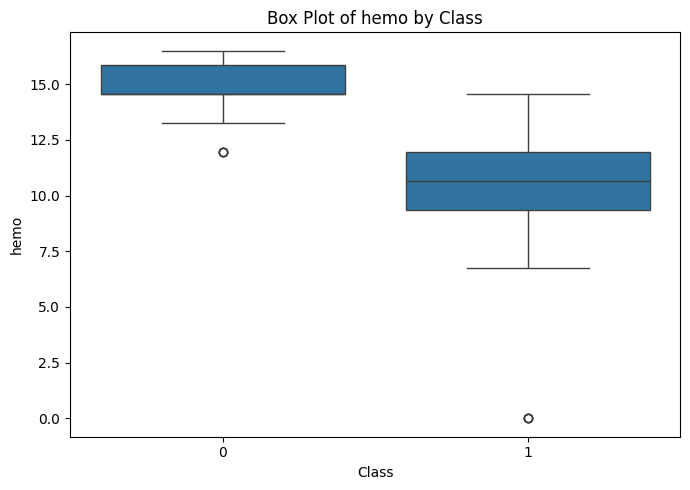

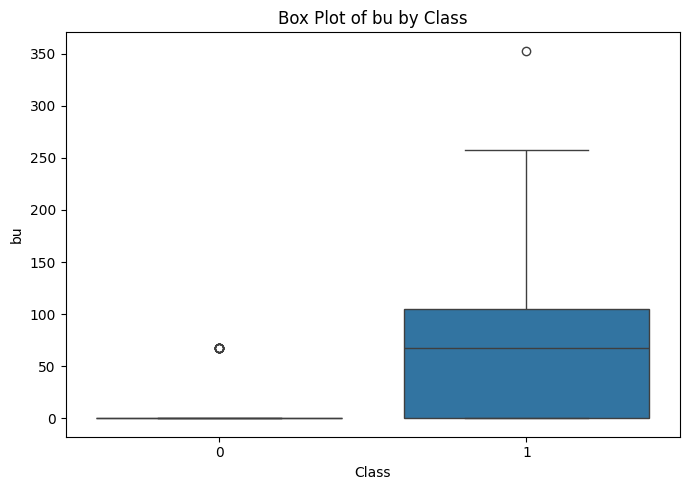

In [41]:
for col in key_numeric:
    if col in df.columns:
        plt.figure(figsize=(7, 5))
        sns.boxplot(data=df, x='class', y=col) # Generate a box plot
        plt.title(f'Box Plot of {col} by Class')
        plt.xlabel('Class')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

In [42]:
outliers_data = {}
print("Initialized 'outliers_data' dictionary.")

Initialized 'outliers_data' dictionary.


In [43]:
for col in key_numeric:
    for class_label in df['class'].unique():
        subset = df[(df['class'] == class_label) & (df[col].notna())][col]

        Q1 = subset.quantile(0.25)
        Q3 = subset.quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df['class'] == class_label) & ((df[col] < lower_bound) | (df[col] > upper_bound))]

        if not outliers.empty:
            outliers_data[(col, class_label)] = outliers
            print(f"Outliers identified for {col} in class {class_label}: {len(outliers)} samples")
        else:
            print(f"No outliers identified for {col} in class {class_label}")

print("Outlier identification complete. The 'outliers_data' dictionary contains the identified outliers.")

Outliers identified for sc in class 1: 6 samples
No outliers identified for sc in class 0
Outliers identified for hemo in class 1: 4 samples
Outliers identified for hemo in class 0: 4 samples
Outliers identified for bu in class 1: 1 samples
Outliers identified for bu in class 0: 9 samples
Outlier identification complete. The 'outliers_data' dictionary contains the identified outliers.


In [44]:
print("\n--- Sample of Identified Outliers ---")
for (col, class_label), outliers_df in outliers_data.items():
    print(f"\nSample of Outliers for {col} in class {class_label} ({len(outliers_df)} samples total):")
    display(outliers_df.head())



--- Sample of Identified Outliers ---

Sample of Outliers for sc in class 1 (6 samples total):


,sg,al,rbc,su,pc,pcc,ba,bgr,bu,sod,...,rbcc_≥ 7.41,wbcc_14500 - 16880,wbcc_16880 - 19260,wbcc_19260 - 21640,wbcc_4980 - 7360,wbcc_7360 - 9740,wbcc_9740 - 12120,wbcc_< 4980,wbcc_≥ 24020,class
23,1.023,0.0,1,0.0,1,0,0,133.0,219.55,0.0,...,False,False,False,False,False,False,False,True,False,1
65,1.016,0.0,1,0.0,0,1,0,0.0,219.55,120.5,...,False,False,False,False,True,False,False,False,False,1
98,1.010,0.0,1,0.0,1,0,0,259.0,219.55,130.5,...,False,True,False,False,False,False,False,False,False,1
111,1.010,0.0,0,0.0,1,0,0,0.0,181.45,135.5,...,False,False,False,False,False,False,False,True,False,1
156,1.010,0.0,0,0.0,1,0,0,175.0,352.90,158.0,...,False,False,False,False,False,True,False,False,False,1



Sample of Outliers for hemo in class 1 (4 samples total):


,sg,al,rbc,su,pc,pcc,ba,bgr,bu,sod,...,rbcc_≥ 7.41,wbcc_14500 - 16880,wbcc_16880 - 19260,wbcc_19260 - 21640,wbcc_4980 - 7360,wbcc_7360 - 9740,wbcc_9740 - 12120,wbcc_< 4980,wbcc_≥ 24020,class
23,1.023,0.0,1,0.0,1,0,0,133.0,219.55,0.0,...,False,False,False,False,False,False,False,True,False,1
73,1.020,0.0,0,0.0,0,0,0,0.0,105.25,125.5,...,False,False,False,False,True,False,False,False,False,1
76,1.016,0.0,1,0.0,1,0,0,133.0,105.25,130.5,...,False,False,False,False,True,False,False,False,False,1
167,1.020,0.0,1,0.0,1,0,1,175.0,105.25,140.5,...,False,False,False,False,False,True,False,False,False,1



Sample of Outliers for hemo in class 0 (4 samples total):


,sg,al,rbc,su,pc,pcc,ba,bgr,bu,sod,...,rbcc_≥ 7.41,wbcc_14500 - 16880,wbcc_16880 - 19260,wbcc_19260 - 21640,wbcc_4980 - 7360,wbcc_7360 - 9740,wbcc_9740 - 12120,wbcc_< 4980,wbcc_≥ 24020,class
12,1.02,0.0,0,0.0,0,0,0,0.0,0.0,145.5,...,False,False,False,False,False,False,True,False,False,0
18,1.02,0.0,0,0.0,0,0,0,133.0,0.0,145.5,...,False,False,False,False,False,True,False,False,False,0
38,1.02,0.0,0,0.0,0,0,0,133.0,0.0,150.5,...,False,False,False,False,False,True,False,False,False,0
45,1.02,0.0,0,0.0,0,0,0,133.0,0.0,135.5,...,False,False,False,False,False,True,False,False,False,0



Sample of Outliers for bu in class 1 (1 samples total):


,sg,al,rbc,su,pc,pcc,ba,bgr,bu,sod,...,rbcc_≥ 7.41,wbcc_14500 - 16880,wbcc_16880 - 19260,wbcc_19260 - 21640,wbcc_4980 - 7360,wbcc_7360 - 9740,wbcc_9740 - 12120,wbcc_< 4980,wbcc_≥ 24020,class
156,1.01,0.0,0,0.0,1,0,0,175.0,352.9,158.0,...,False,False,False,False,False,True,False,False,False,1



Sample of Outliers for bu in class 0 (9 samples total):


,sg,al,rbc,su,pc,pcc,ba,bgr,bu,sod,...,rbcc_≥ 7.41,wbcc_14500 - 16880,wbcc_16880 - 19260,wbcc_19260 - 21640,wbcc_4980 - 7360,wbcc_7360 - 9740,wbcc_9740 - 12120,wbcc_< 4980,wbcc_≥ 24020,class
8,1.023,0.0,0,0.0,0,0,0,133.0,67.15,135.5,...,False,False,False,False,False,False,False,True,False,0
14,1.023,0.0,0,0.0,0,0,0,133.0,67.15,135.5,...,False,False,False,False,True,False,False,False,False,0
48,1.023,0.0,0,0.0,0,0,0,133.0,67.15,135.5,...,False,False,False,False,False,True,False,False,False,0
96,1.020,0.0,0,0.0,0,0,0,133.0,67.15,150.5,...,False,False,False,False,True,False,False,False,False,0
103,1.020,0.0,0,0.0,0,0,0,0.0,67.15,150.5,...,False,False,False,False,False,False,True,False,False,0


model

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

#create logistic regression model
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000)

#fit the model
log_reg.fit(X_train, y_train)

#predict on test set
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]  # needed for AUC


In [56]:
print("=== Logistic Regression Evaluation ===")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))
print("ROC-AUC :", roc_auc_score(y_test, y_proba))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


=== Logistic Regression Evaluation ===
Accuracy : 0.9
Precision: 0.9230769230769231
Recall   : 0.9230769230769231
F1-score : 0.9230769230769231
ROC-AUC : 0.989010989010989

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.92      0.92      0.92        26

    accuracy                           0.90        40
   macro avg       0.89      0.89      0.89        40
weighted avg       0.90      0.90      0.90        40


Confusion Matrix:
[[12  2]
 [ 2 24]]


Top Logistic Regression Coefficients:


,feature,coefficient
12,hemo,-0.842286
14,htn,0.808338
17,appet,0.566372
24,rbcc_4.46 - 5.05,0.545991
15,dm,0.542650
33,wbcc_4980 - 7360,-0.535988
13,pcv,-0.386243
34,wbcc_7360 - 9740,0.366248
25,rbcc_5.05 - 5.64,-0.363732
18,pe,0.305577


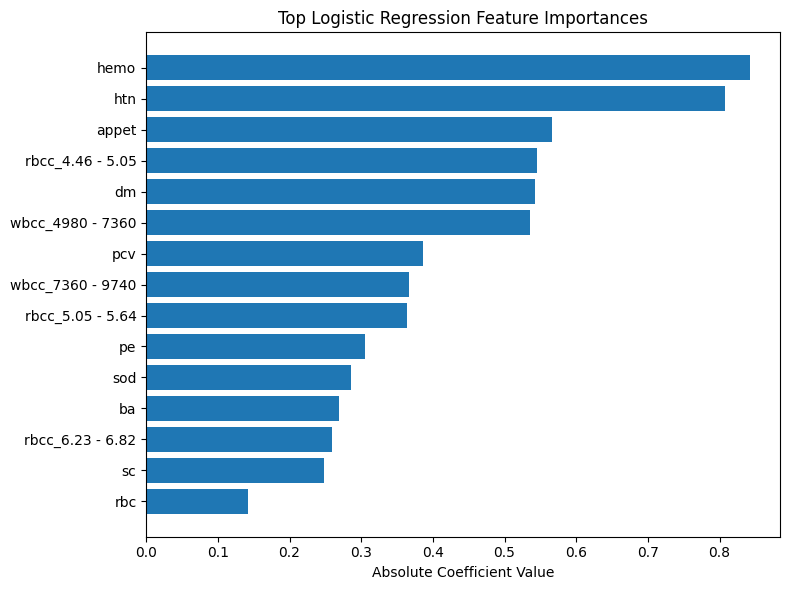

In [59]:
import matplotlib.pyplot as plt

coef_df = pd.DataFrame({
    'feature': x.columns,
    'coefficient': log_reg.coef_[0]
}).sort_values('coefficient', key=abs, ascending=False)

print("Top Logistic Regression Coefficients:")
display(coef_df.head(15))

# Bar plot for visualizing feature importance
plt.figure(figsize=(8, 6))
top_k = 15 # Display top 15 features
plt.barh(
    coef_df['feature'].head(top_k)[::-1], # Reverse order to have the most important at the top
    coef_df['coefficient'].head(top_k).abs()[::-1] # Use absolute values for importance magnitude
)
plt.xlabel('Absolute Coefficient Value')
plt.title('Top Logistic Regression Feature Importances')
plt.tight_layout()
plt.show()

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
)

#base RF model
rf = RandomForestClassifier(
    class_weight='balanced',   # important for medical imbalance
    random_state=42,
    n_jobs=-1
)

#parameter
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

print("Best Random Forest params:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_


Best Random Forest params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


In [49]:
#predictions
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

print("=== Random Forest Evaluation ===")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))   # key in CKD
print("F1-score :", f1_score(y_test, y_pred_rf))
print("ROC-AUC :", roc_auc_score(y_test, y_proba_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


=== Random Forest Evaluation ===
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-score : 1.0
ROC-AUC : 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        26

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40


Confusion Matrix:
[[14  0]
 [ 0 26]]


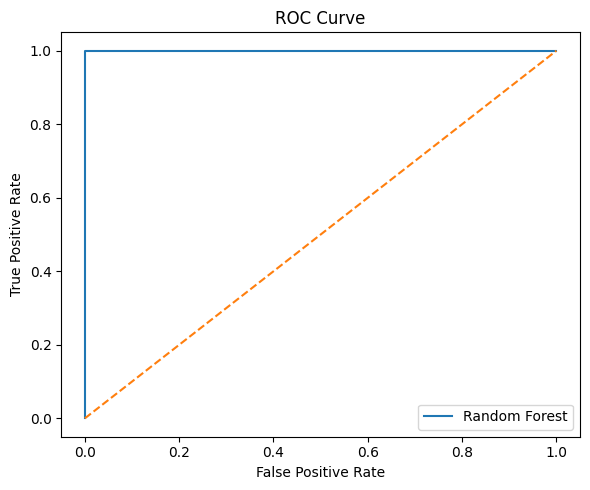

In [50]:
#ROC curves
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr_rf, tpr_rf, label='Random Forest')

plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.tight_layout()
plt.show()


Top Random Forest Feature Importances:


,feature,importance
12,hemo,0.222119
13,pcv,0.150892
20,grf,0.144160
0,sg,0.081105
14,htn,0.074746
15,dm,0.065942
9,sod,0.050770
8,bu,0.046060
7,bgr,0.024563
4,pc,0.020378


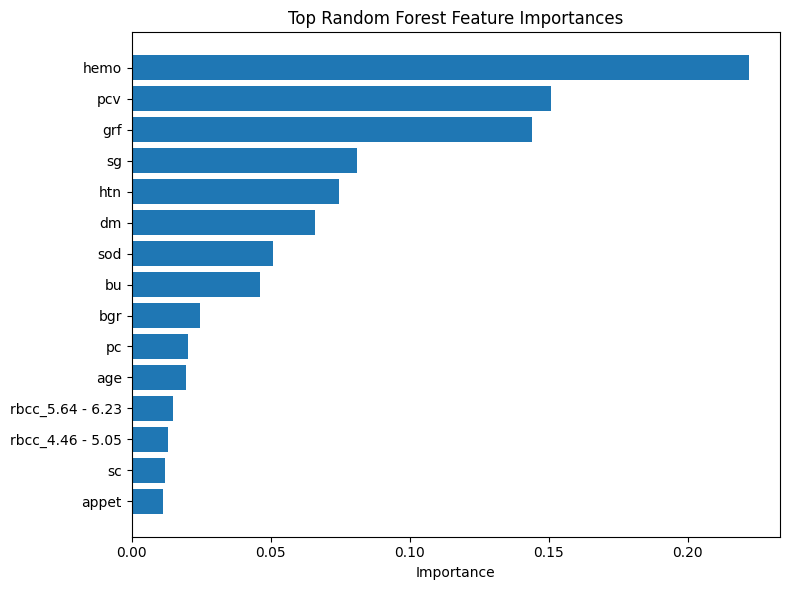

In [51]:
import pandas as pd
import numpy as np

rf_importances = pd.DataFrame({
    'feature': x.columns,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)

print("Top Random Forest Feature Importances:")
display(rf_importances.head(15))

#bar pllot for vis
plt.figure(figsize=(8,6))
top_k = 15
plt.barh(
    rf_importances['feature'].head(top_k)[::-1],
    rf_importances['importance'].head(top_k)[::-1]
)
plt.xlabel('Importance')
plt.title('Top Random Forest Feature Importances')
plt.tight_layout()
plt.show()


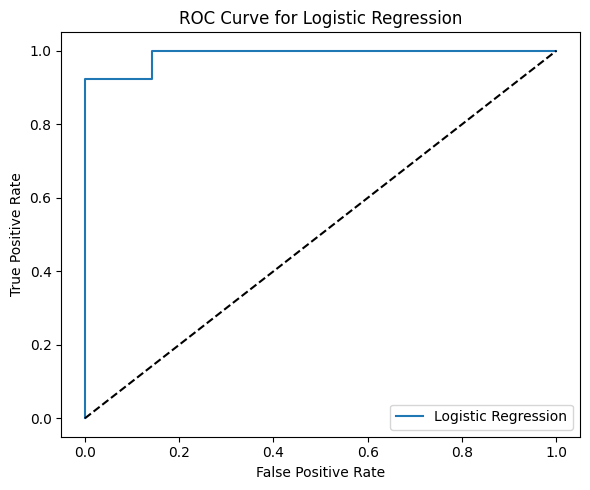

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Ensure y_test and y_proba are defined
# (Copied from previous cells to resolve NameError in case of kernel reset or out-of-order execution)

# Target as 1D series (from cell jdSY0uZkeen8)
y_series = y['class'].astype(int)

# Train/test split (from cell jdSY0uZkeen8)
X_train, X_test, y_train, y_test = train_test_split(
    x, y_series,
    test_size=0.2,
    random_state=42,
    stratify=y_series
)

# Scale features (from cell jdSY0uZkeen8, though X_test is used unscaled for log_reg prediction below)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create logistic regression model and fit (from cell X7nNndZY73p3)
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000)
log_reg.fit(X_train, y_train) # Note: using unscaled X_train as per original code

# Predict probabilities for ROC (from cell X7nNndZY73p3)
y_proba = log_reg.predict_proba(X_test)[:, 1]

# Calculate ROC curve for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(6,5))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()